In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 500)
color_pal = plt.rcParamas['axes.prop_cycle'].by_key()['color']
from fredapi import Fred

fred_key = 'f16c75b70435294b649e7a3bd0b95f9b'

1. Create the Fred Object

In [13]:
fred = Fred(api_key= fred_key)  


2. Search for economic data!

In [16]:
sp_search = fred.search('S&P', order_by= 'popularity')

3. Pull Raw Data   

In [19]:
sp500 = fred.get_series(series_id = 'SP500')

<Axes: title={'center': 'S&P 500'}>

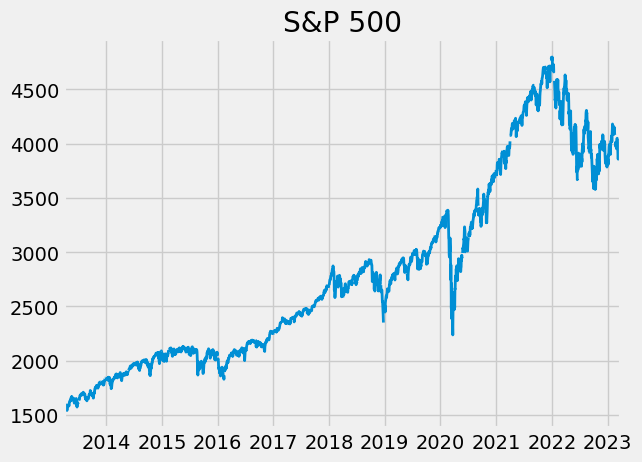

In [21]:
sp500.plot(title= 'S&P 500', lw = 2)

4. Pull and Join Multiple Data Series

In [45]:
unemp_df = fred.search('unemployment rate state', filter = ('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'M0892AUSM156SNBR', 'M0892BUSM156SNBR',
       'FLUR', 'U2RATE', 'LNS14000002', 'TXUR', 'NYUR', 'LNS14000031',
       'LNS14000024', 'LNS14027662', 'LNS14000009', 'LNS14027660',
       'LNS14000001', 'OHUR', 'LNS14000003', 'ILUR', 'MIUR', 'ALUR',
       'LRUN64TTUSM156S', 'NCUR', 'PAUR', 'MNUR', 'KYUR', 'VAUR', 'NJUR',
       'COUR', 'GAUR', 'MAUR', 'NMUR', 'TNUR', 'INUR', 'LNS14032183', 'IAUR',
       'WIUR', 'LNS14027659', 'AKUR', 'WAUR', 'SCUR', 'AZUR', 'MOUR', 'WVUR',
       'OKUR', 'ORUR', 'LASMT261982000000003', 'UTUR', 'LNS14000012', 'ARUR',
       'LNS14000018', 'LNS14024887', 'MDUR', 'NVUR', 'HIUR', 'PRUR', 'LAUR',
       'DCUR', 'KSUR', 'MTUR', 'WYUR', 'MEUR', 'NDUR', 'NEUR', 'CTUR', 'SDUR',
       'LNS14000060', 'CMWRUR', 'MSUR', 'IDUR', 'NHUR', 'LASMT391746000000003',
       'LNS14000036', 'DEUR', 'LNS14000032', 'RIUR', 'CNERUR', 'VTUR',
       'LNS14027689', 'LRHUTTTTUSM156S', 'LNS14000028', 'LRUNTTTTUSM156S',
       'CWSTUR', 'LNS14

In [ ]:
all_results = []
for myId in unemp_df.index:
    
    if len(myId) == 4:
        print(myId)
        results = fred.get_series(myId)
        results = results.to_frame(name = myId)
        all_results.append(results)
    else:
        continue

all_results

In [91]:
unemp_states = pd.concat(all_results, axis = 1)
unemp_states = unemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]
unemp_states

,California,Florida,Texas,New York,Ohio,Illinois,Michigan,Alabama,North Carolina,Pennsylvania,...,North Dakota,Nebraska,Connecticut,South Dakota,Mississippi,Idaho,New Hampshire,Delaware,Rhode Island,Vermont
1976-01-01,9.2,9.7,5.8,10.3,8.1,6.6,9.9,6.6,6.4,8.0,...,3.4,3.3,9.8,3.3,6.7,5.6,6.5,8.0,7.8,8.6
1976-02-01,9.2,9.7,5.8,10.3,8.1,6.6,9.9,6.6,6.4,8.1,...,3.4,3.3,9.8,3.3,6.7,5.6,6.5,8.0,7.8,8.6
1976-03-01,9.1,9.6,5.9,10.2,8.1,6.6,9.9,6.6,6.4,8.1,...,3.4,3.3,9.8,3.2,6.6,5.6,6.5,8.0,7.7,8.6
1976-04-01,9.1,9.5,5.9,10.2,8.0,6.6,9.8,6.5,6.3,8.1,...,3.5,3.2,9.6,3.1,6.4,5.6,6.5,8.1,7.7,8.6
1976-05-01,9.0,9.3,5.9,10.1,7.8,6.6,9.6,6.4,6.1,8.1,...,3.6,3.1,9.4,3.1,6.3,5.6,6.5,8.3,7.7,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,4.1,2.7,3.9,4.2,4.2,4.6,4.4,2.6,3.9,4.4,...,2.1,2.7,4.0,2.2,4.1,2.8,2.9,4.7,3.4,3.1
2022-11-01,4.1,2.7,3.8,4.1,4.1,4.6,4.4,2.6,3.9,4.4,...,2.1,2.7,4.0,2.2,4.1,2.8,2.9,4.7,3.3,3.1
2022-12-01,4.1,2.7,3.8,4.1,4.1,4.6,4.3,2.6,3.8,4.3,...,2.1,2.7,4.0,2.2,4.0,2.8,2.9,4.6,3.2,3.0
2023-01-01,4.2,2.6,3.9,4.2,4.0,4.5,4.3,2.6,3.8,4.3,...,2.1,2.5,3.9,2.1,3.9,2.7,2.8,4.6,3.1,2.9


In [92]:
px.line(unemp_states)

## Pull May 2020 Unemployment Rate Per State

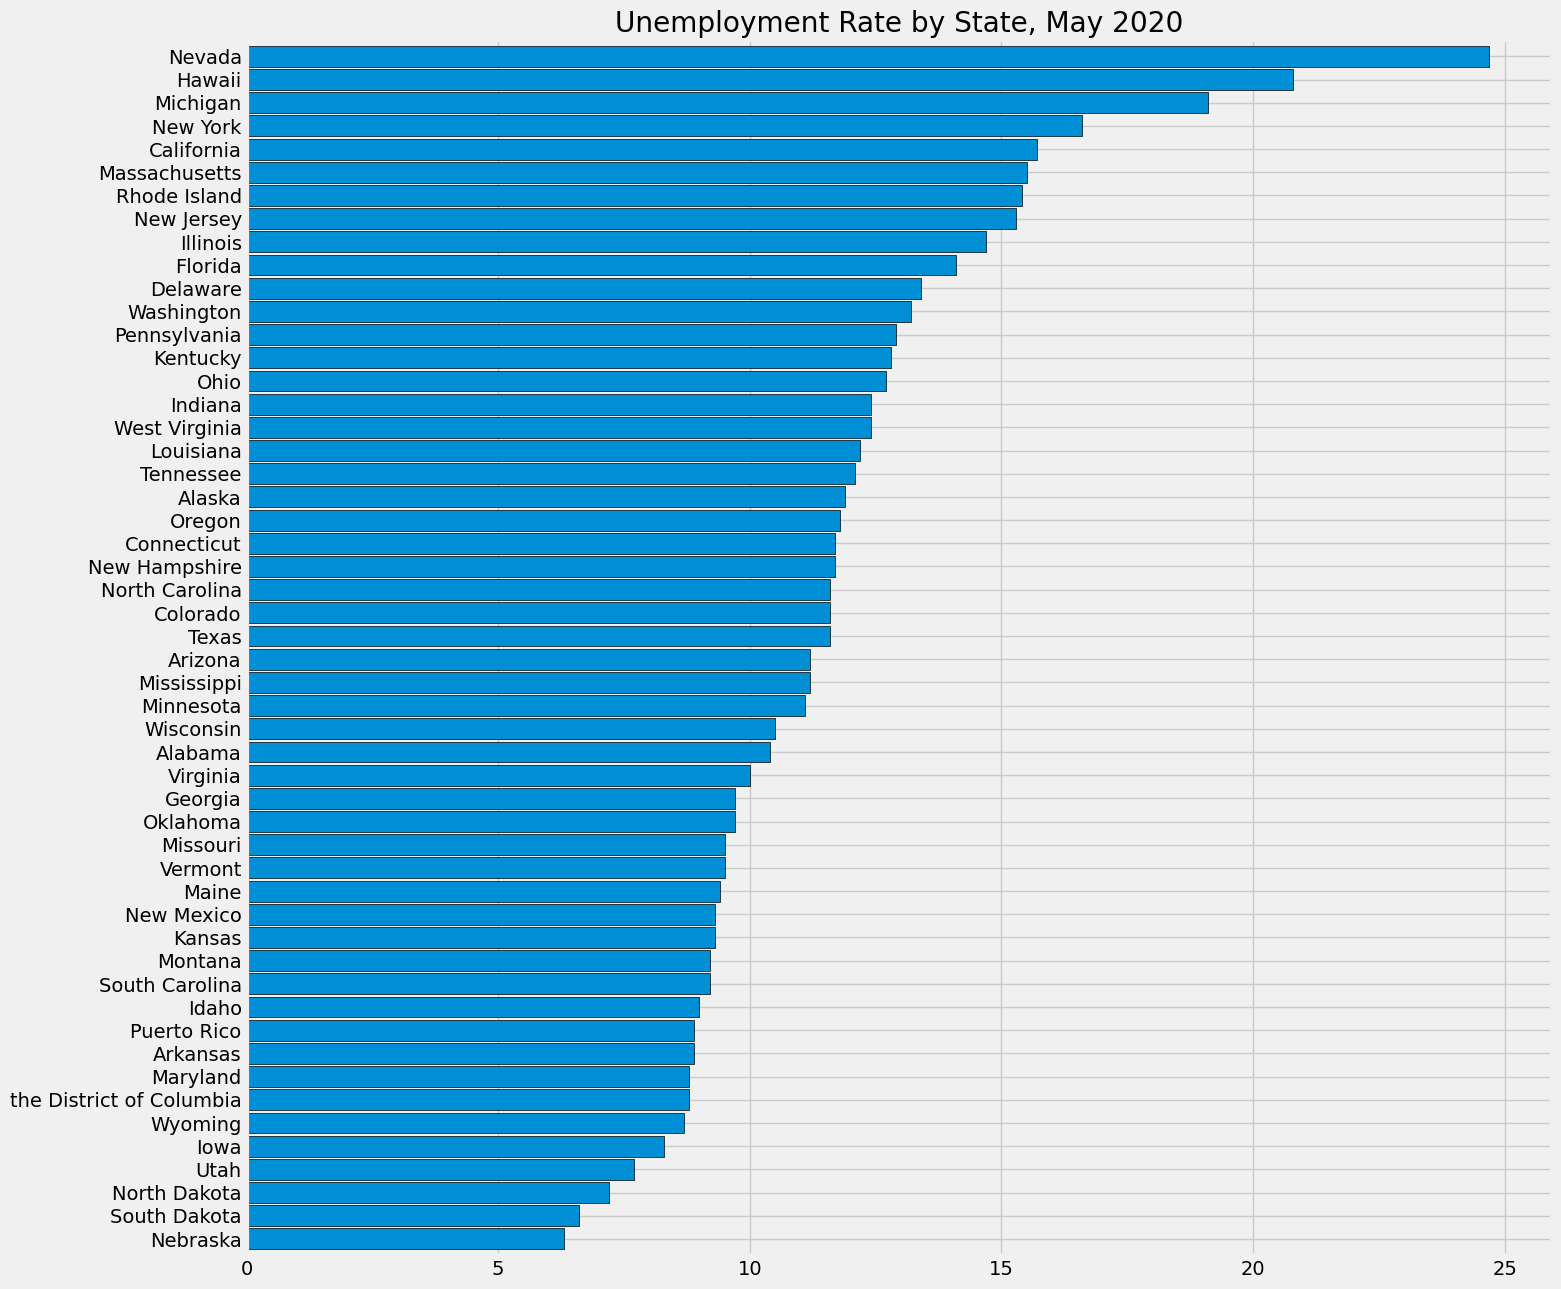

In [97]:

ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T \
                .sort_values('2020-05-01') \
                .plot(kind = 'barh', figsize = (15,15), width = 0.9, edgecolor = 'black',
                    title = 'Unemployment Rate by State, May 2020')
ax.legend().remove()
plt.show()

# Pull Participation Rate